In [57]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Load data
titanic_data = sns.load_dataset('titanic')


In [25]:
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [35]:
# Dataset overview

print("Shape of the dataset:", titanic_data.shape)
print("\nColumns in the dataset:\n", titanic_data.columns)

# Check for missing values

print("\nMissing values in each column:\n", titanic_data.isnull().sum())

# Data types and summary statistics

print("\nData types:\n", titanic_data.dtypes)
print("\nSummary Statistics:\n", titanic_data.describe(include='all'))

Shape of the dataset: (891, 15)

Columns in the dataset:
 Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

Missing values in each column:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Data types:
 survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

Summary Statistics:
           su

In [37]:
# checking missing values

print("\nMissing values in each column:\n", titanic_data.isnull().sum())

print("\nPercentage of missing values in each column:\n", (titanic_data.isnull().sum()/len(titanic_data))*100)


Missing values in each column:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Percentage of missing values in each column:
 survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64


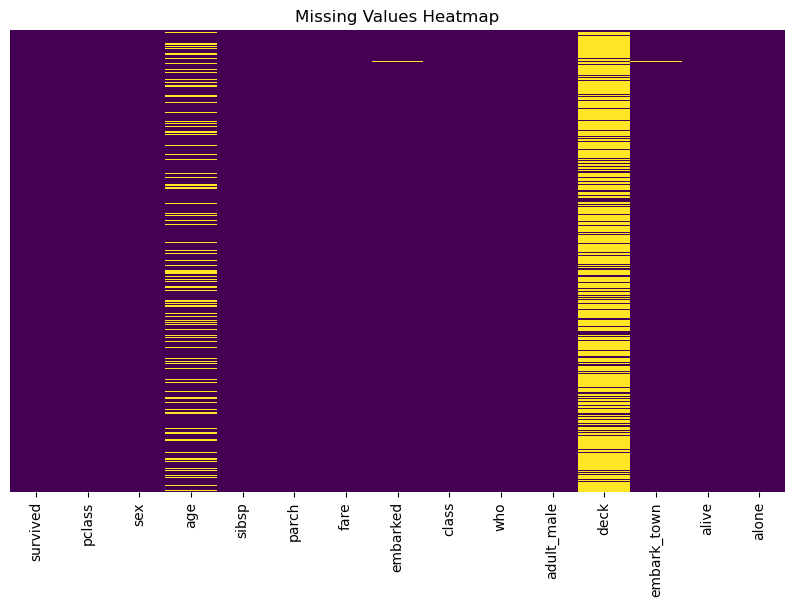

In [39]:
# Create the heatmap

plt.figure(figsize=(10, 6))

sns.heatmap(titanic_data.isnull(), cbar=False, cmap='viridis', yticklabels=False)

plt.title('Missing Values Heatmap')

plt.show()


In [41]:
# Import necessary libraries

from sklearn.experimental import enable_iterative_imputer

from sklearn.impute import IterativeImputer

from sklearn.ensemble import RandomForestRegressor



# Create a copy to avoid modifying the original DataFrame

titanic_data_filled = titanic_data.copy()



# Separate numerical and categorical columns
numerical_cols = titanic_data_filled.select_dtypes(include=['number']).columns

categorical_cols = titanic_data_filled.select_dtypes(exclude=['number']).columns


# Use IterativeImputer for numerical features

imputer_num = IterativeImputer(estimator=RandomForestRegressor(), random_state=0)

titanic_data_filled[numerical_cols] = imputer_num.fit_transform(titanic_data_filled[numerical_cols])


# Fill categorical features with the mode (most frequent value)

for col in categorical_cols:titanic_data_filled[col] = titanic_data_filled[col].fillna(titanic_data_filled[col].mode()[0])


# Verify if there are any missing values left

print("\nMissing values after imputation:\n", titanic_data_filled.isnull().sum())


Missing values after imputation:
 survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


# Univariate analysis


Survival Count:
 survived
0.0    549
1.0    342
Name: count, dtype: int64


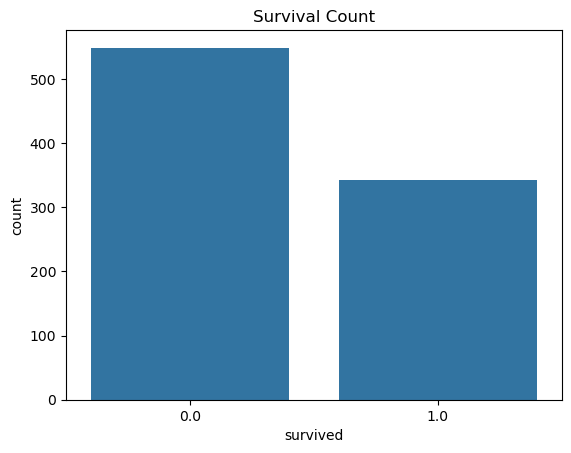


Pclass Distribution:
 pclass
3.0    491
1.0    216
2.0    184
Name: count, dtype: int64


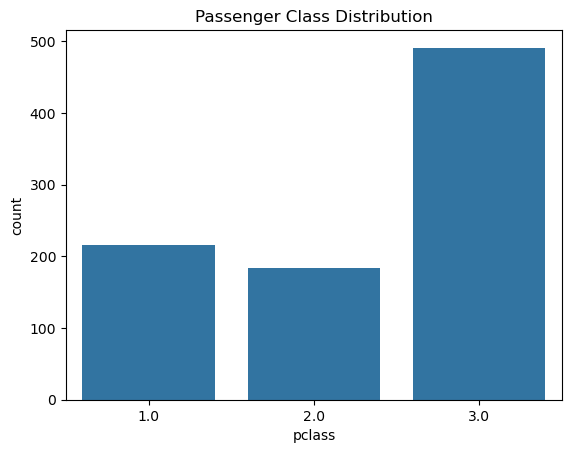


Age Statistics:
 count    891.000000
mean      29.697256
std       13.765680
min        0.420000
25%       21.000000
50%       28.000000
75%       37.000000
max       80.000000
Name: age, dtype: float64


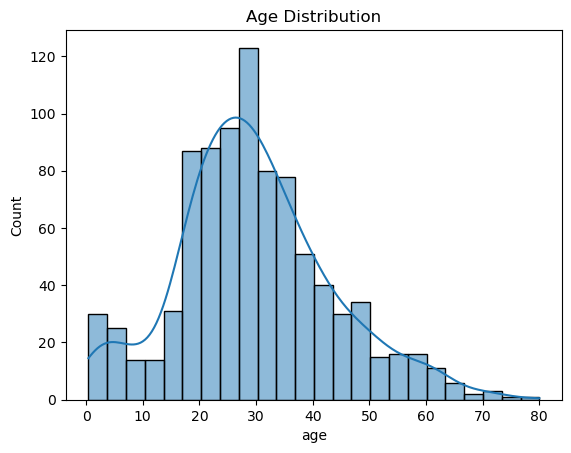


Sex Distribution:
 sex
male      577
female    314
Name: count, dtype: int64


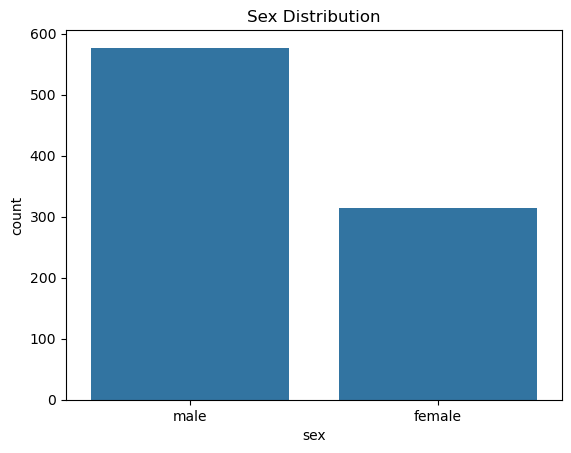

In [44]:
# Analyze 'survived'

print("\nSurvival Count:\n", titanic_data_filled['survived'].value_counts())

sns.countplot(x='survived', data=titanic_data_filled)

plt.title('Survival Count')

plt.show()


# Analyze 'pclass'

print("\nPclass Distribution:\n", titanic_data_filled['pclass'].value_counts())

sns.countplot(x='pclass', data=titanic_data_filled)

plt.title('Passenger Class Distribution')

plt.show()



# Analyze 'age'

print("\nAge Statistics:\n", titanic_data_filled['age'].describe())

sns.histplot(x='age', data=titanic_data_filled, kde=True)

plt.title('Age Distribution')

plt.show()



# Analyze 'sex'

print("\nSex Distribution:\n", titanic_data_filled['sex'].value_counts())

sns.countplot(x='sex', data=titanic_data_filled)

plt.title('Sex Distribution')

plt.show()

# Bivariate analysis


Survival by Gender:
 sex     survived
female  1.0         233
        0.0          81
male    0.0         468
        1.0         109
Name: count, dtype: int64


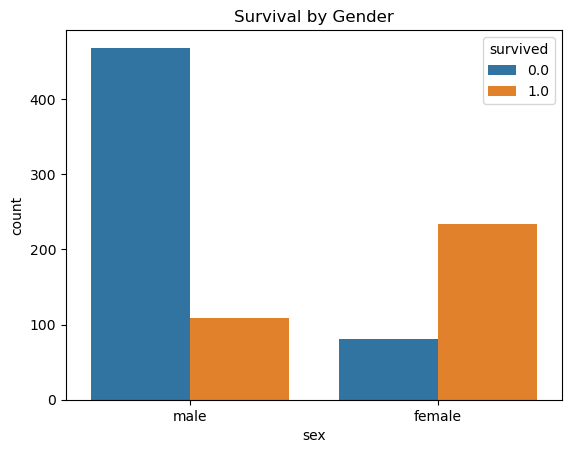


Survival by Passenger Class:
 pclass  survived
1.0     1.0         136
        0.0          80
2.0     0.0          97
        1.0          87
3.0     0.0         372
        1.0         119
Name: count, dtype: int64


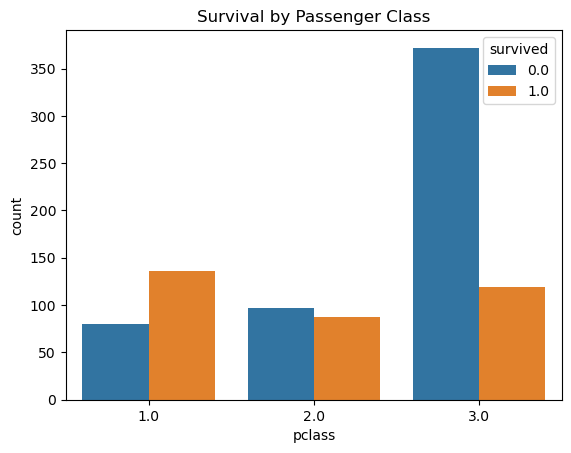


Survival by Age Group:
 age_group  survived
Child      0.0          80
           1.0          76
Adult      0.0         462
           1.0         265
Senior     0.0           7
           1.0           1
Name: count, dtype: int64


C:\Users\vaish\AppData\Local\Temp\ipykernel_6496\3376530165.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print("\nSurvival by Age Group:\n", titanic_data_filled.groupby('age_group')['survived'].value_counts())


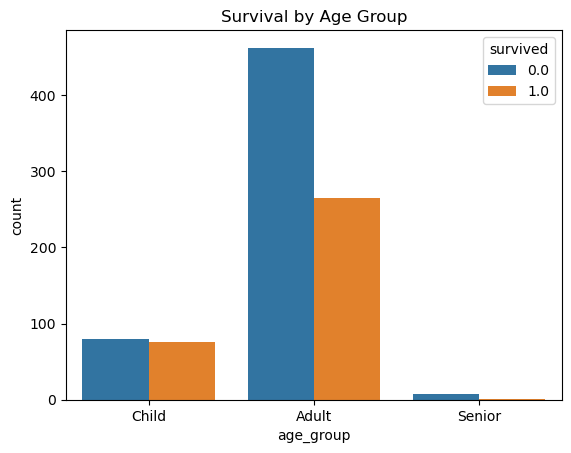


Survival by Gender and Class:
 sex     pclass  survived
female  1.0     1.0          91
                0.0           3
        2.0     1.0          70
                0.0           6
        3.0     0.0          72
                1.0          72
male    1.0     0.0          77
                1.0          45
        2.0     0.0          91
                1.0          17
        3.0     0.0         300
                1.0          47
Name: count, dtype: int64


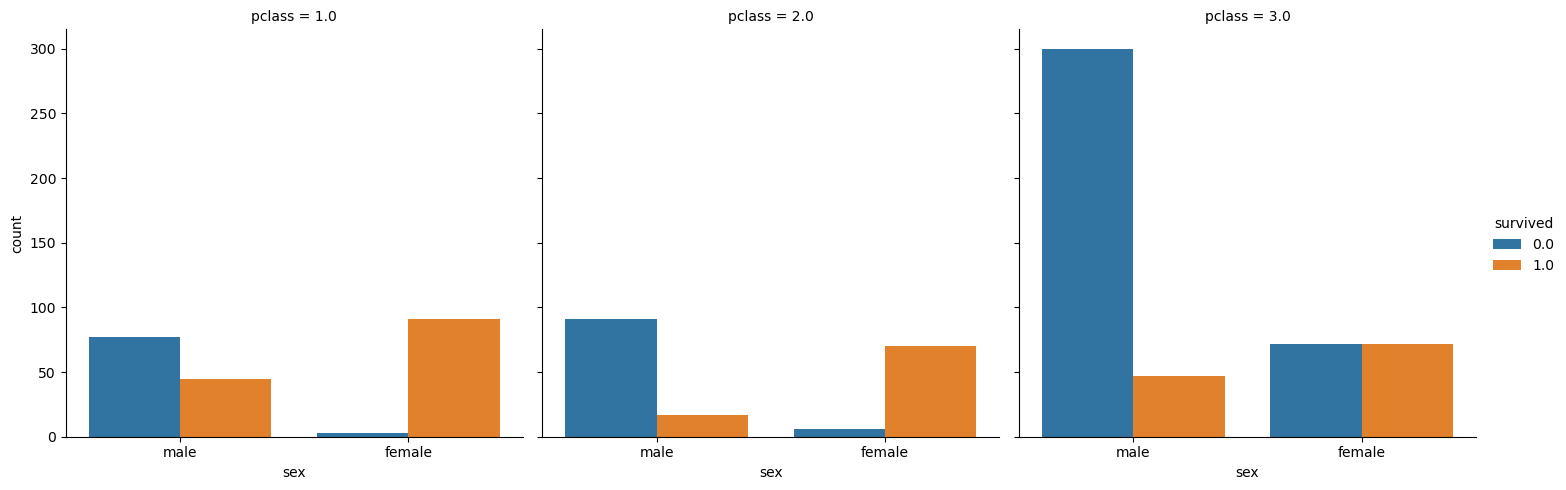

In [47]:
# Analyze survival based on gender

print("\nSurvival by Gender:\n", titanic_data_filled.groupby('sex')['survived'].value_counts())

sns.countplot(x='sex', hue='survived', data=titanic_data_filled)

plt.title('Survival by Gender')

plt.show()



# Analyze survival based on passenger class

print("\nSurvival by Passenger Class:\n", titanic_data_filled.groupby('pclass')['survived'].value_counts())

sns.countplot(x='pclass', hue='survived', data=titanic_data_filled)

plt.title('Survival by Passenger Class')

plt.show()



# Analyze survival based on age groups (create age bins)

titanic_data_filled['age_group'] = pd.cut(titanic_data_filled['age'], bins=[0, 18, 65, 100], labels=['Child', 'Adult', 'Senior'])

print("\nSurvival by Age Group:\n", titanic_data_filled.groupby('age_group')['survived'].value_counts())

sns.countplot(x='age_group', hue='survived', data=titanic_data_filled)

plt.title('Survival by Age Group')

plt.show()



# Further exploration: Analyze survival based on combinations of factors

# Example: Survival based on gender and class

print("\nSurvival by Gender and Class:\n", titanic_data_filled.groupby(['sex', 'pclass'])['survived'].value_counts())

sns.catplot(x='sex', hue='survived', col='pclass', kind='count', data=titanic_data_filled)

plt.show()


In [ ]:
# Survival anal

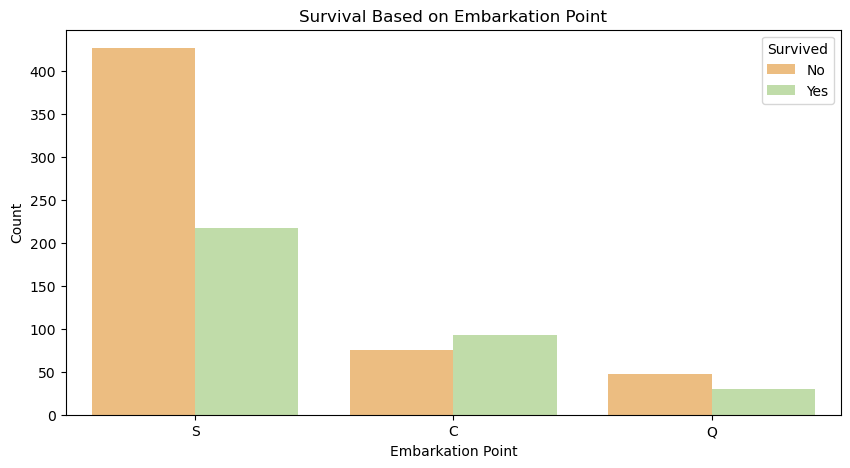

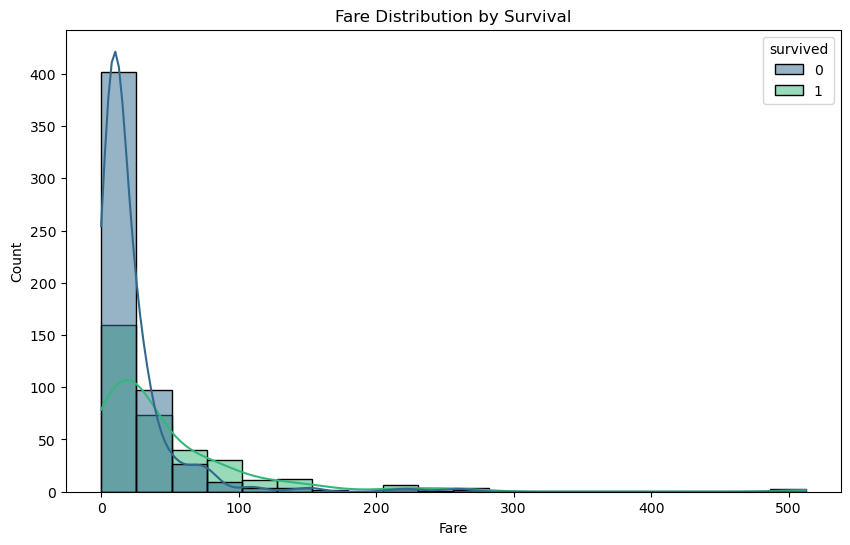

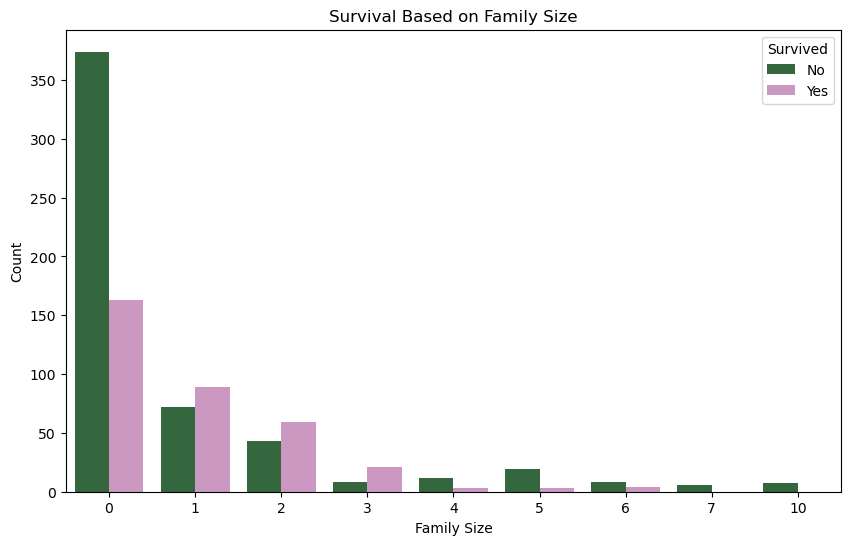

In [49]:
# Survival Based on Embarkation Point

plt.figure(figsize=(10, 5))

sns.countplot(x='embarked', hue='survived', data=titanic_data, palette='Spectral')

plt.title('Survival Based on Embarkation Point')

plt.xlabel('Embarkation Point')

plt.ylabel('Count')

plt.legend(title='Survived', labels=['No', 'Yes'])

plt.show()

# Survival Based on Fare

plt.figure(figsize=(10, 6))

sns.histplot(titanic_data, x='fare', hue='survived', bins=20, kde=True, palette='viridis')

plt.title('Fare Distribution by Survival')

plt.xlabel('Fare')

plt.ylabel('Count')

plt.show()

# Family Size Analysis

titanic_data['family_size'] = titanic_data['sibsp'] + titanic_data['parch']



plt.figure(figsize=(10, 6))

sns.countplot(x='family_size', hue='survived', data=titanic_data, palette='cubehelix')

plt.title('Survival Based on Family Size')

plt.xlabel('Family Size')

plt.ylabel('Count')

plt.legend(title='Survived', labels=['No', 'Yes'])

plt.show()

# Feature Engineering

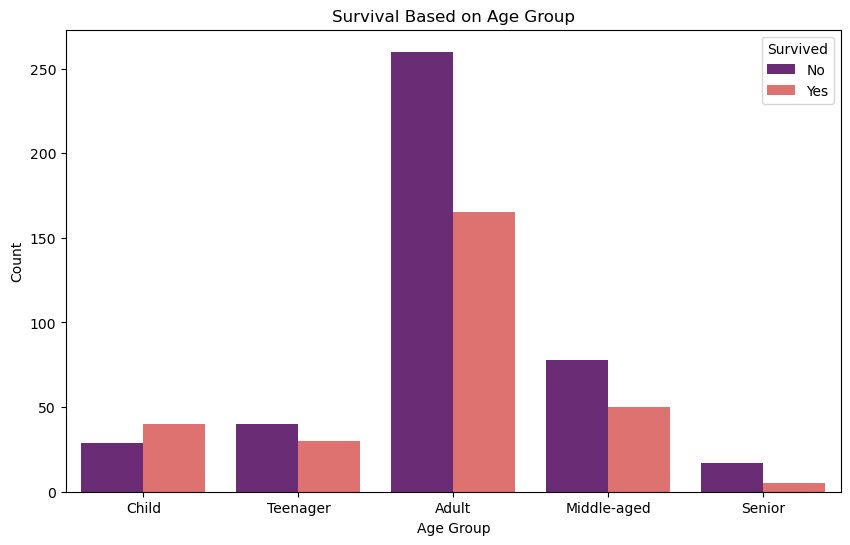

In [52]:
# Create Age Group

bins = [0, 12, 18, 40, 60, 80]

labels = ['Child', 'Teenager', 'Adult', 'Middle-aged', 'Senior']

titanic_data['age_group'] = pd.cut(titanic_data['age'], bins=bins, labels=labels)



# Visualize Survival by Age Group

plt.figure(figsize=(10, 6))

sns.countplot(x='age_group', hue='survived', data=titanic_data, palette='magma')

plt.title('Survival Based on Age Group')

plt.xlabel('Age Group')

plt.ylabel('Count')

plt.legend(title='Survived', labels=['No', 'Yes'])

plt.show()

# Advanced visualization

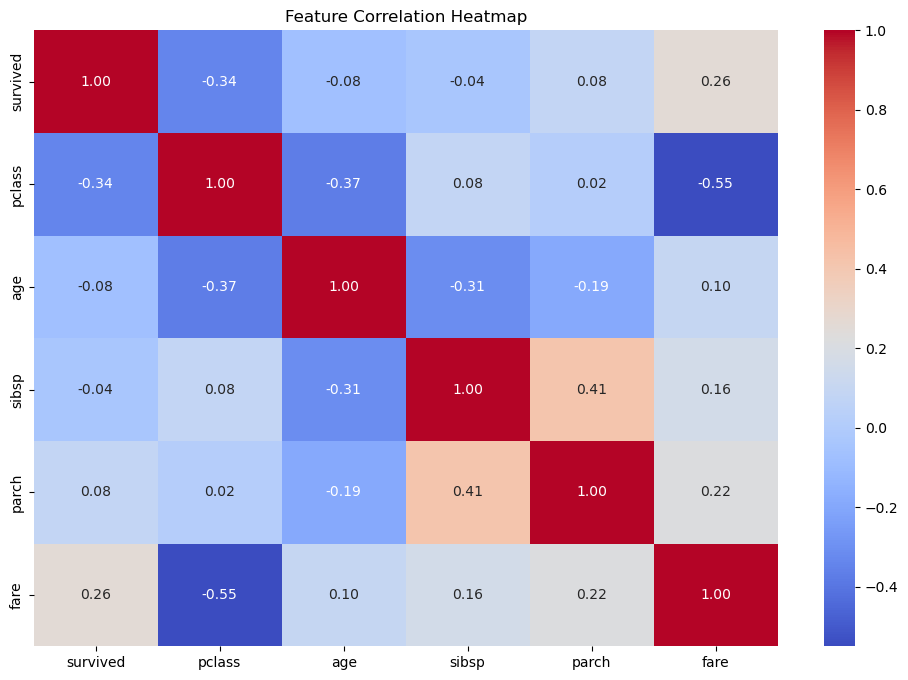

In [59]:
# Correlation heatmap

plt.figure(figsize=(12, 8))

# Select only numeric features for correlation calculation

numeric_features = titanic_data.select_dtypes(include=np.number)

sns.heatmap(numeric_features.corr(), annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Feature Correlation Heatmap')

plt.show()